In [1]:
!git status

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/
	Untitled.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [9]:
!git add pendigits.ipynb
!git commit -m "show"
!git push --set-upstream origin master

On branch master
Untracked files:
	.ipynb_checkpoints/

nothing added to commit but untracked files present


fatal: HttpRequestException encountered.
   Une erreur s'est produite lors de l'envoi de la demande.
bash: /dev/tty: No such device or address
error: failed to execute prompt script (exit code 1)
fatal: could not read Username for 'https://github.com': No error


In [4]:
import pandas as pd 

In [5]:
df_train = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra", sep=',', header=None)
df_test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes", sep=',', header=None)


In [6]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [7]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [11]:
test = df_test.head()

In [67]:
test.iloc[0][0]


88

In [81]:


xsList = []
ysList =[]

In [85]:
xs =[]
ys =[]

i=0
while( i < 16):
    xs.append(test.iloc[2][i])
    ys.append(test.iloc[2][i+1])
    i = i+2
    
    
xsList.append(xs)
ysList.append(ys)

In [16]:
import matplotlib.pyplot as plt

In [86]:
xsList

[[88, 2, 16, 94, 70, 0, 42, 100],
 [80, 18, 60, 100, 42, 0, 42, 56],
 [0, 9, 20, 7, 20, 70, 100, 18]]

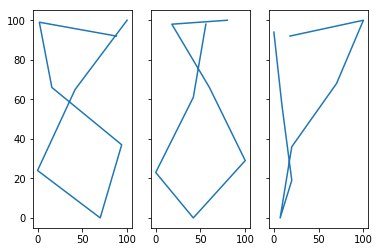

In [88]:

f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True)
ax1.plot(xsList[0], ysList[0])

ax2.plot(xsList[1], ysList[1])

ax3.plot(xsList[2], ysList[2])